# Libraries

In [1]:
import sklearn
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from subprocess import check_output
#from sklearn.preprocessing  import Imputer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data

In [2]:
#1= load dataset :D

df = pd.read_csv('us_covid19_daily.csv')
df

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,...,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,...,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,20200126,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-26T24:00:00Z,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b
316,20200125,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-25T24:00:00Z,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35
317,20200124,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b
318,20200123,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981


#  2- clean DATA 'missing value':

In [3]:
### show the number of string :D

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      320 non-null    int64  
 1   states                    320 non-null    int64  
 2   positive                  320 non-null    int64  
 3   negative                  320 non-null    int64  
 4   pending                   278 non-null    float64
 5   hospitalizedCurrently     265 non-null    float64
 6   hospitalizedCumulative    278 non-null    float64
 7   inIcuCurrently            256 non-null    float64
 8   inIcuCumulative           257 non-null    float64
 9   onVentilatorCurrently     257 non-null    float64
 10  onVentilatorCumulative    250 non-null    float64
 11  recovered                 257 non-null    float64
 12  dateChecked               320 non-null    object 
 13  death                     301 non-null    float64
 14  hospitaliz

In [4]:

soso=df.isnull().sum()
soso

date                         0
states                       0
positive                     0
negative                     0
pending                     42
hospitalizedCurrently       55
hospitalizedCumulative      42
inIcuCurrently              64
inIcuCumulative             63
onVentilatorCurrently       63
onVentilatorCumulative      70
recovered                   63
dateChecked                  0
death                       19
hospitalized                42
totalTestResults             0
lastModified                 0
total                        0
posNeg                       0
deathIncrease                0
hospitalizedIncrease         0
negativeIncrease             0
positiveIncrease             0
totalTestResultsIncrease     0
hash                         0
dtype: int64

In [5]:
### particulary :only this column have amissing value : 
soso[4:15]

pending                   42
hospitalizedCurrently     55
hospitalizedCumulative    42
inIcuCurrently            64
inIcuCumulative           63
onVentilatorCurrently     63
onVentilatorCumulative    70
recovered                 63
dateChecked                0
death                     19
hospitalized              42
dtype: int64

In [6]:
#      hash  - lastModified - lastModified   

#see what percentage of the values in our dataset were missing

total_cells = np.product(df.shape)
total_missing = soso.sum()

(total_missing/total_cells) * 100
############################## %%%%  soo cool  : D


6.5375000000000005

In [7]:
#      hash  - lastModified - lastModified   

#see what percentage of the values in our dataset were missing

total_cells = np.product(df.shape)
total_missing = df.isnull().sum()

(total_missing/total_cells) * 100
############################## %%%%   for all column  


date                        0.0000
states                      0.0000
positive                    0.0000
negative                    0.0000
pending                     0.5250
hospitalizedCurrently       0.6875
hospitalizedCumulative      0.5250
inIcuCurrently              0.8000
inIcuCumulative             0.7875
onVentilatorCurrently       0.7875
onVentilatorCumulative      0.8750
recovered                   0.7875
dateChecked                 0.0000
death                       0.2375
hospitalized                0.5250
totalTestResults            0.0000
lastModified                0.0000
total                       0.0000
posNeg                      0.0000
deathIncrease               0.0000
hospitalizedIncrease        0.0000
negativeIncrease            0.0000
positiveIncrease            0.0000
totalTestResultsIncrease    0.0000
hash                        0.0000
dtype: float64

In [8]:
# get a small subset of the NFL dataset
#,'hospitalizedCurrently','hospitalizedCumulative'
#,'inIcuCurrently', ,'inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative' [ 
subset_df = df.loc[ :, 'pending':'recovered' ]
subset_df

,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered
0,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,3322.0,5624444.0
1,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,3321.0,5576026.0
2,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,3305.0,5470389.0
3,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,3280.0,5404018.0
4,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,3252.0,5322128.0
...,...,...,...,...,...,...,...,...
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
###########3          soooo bad :
## bad: fill the missing value in :0 
badrule=subset_df.fillna(0)
badrule

,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered
0,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,3322.0,5624444.0
1,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,3321.0,5576026.0
2,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,3305.0,5470389.0
3,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,3280.0,5404018.0
4,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,3252.0,5322128.0
...,...,...,...,...,...,...,...,...
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
### the best way to clean data : imputer

In [11]:
##### 2- missing value :  using mean value strategy   
## [4 - 15 ]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)
dfn=df

In [12]:

imputer = imputer.fit(dfn.iloc[:,4:11])
dfn.iloc[:,4:11]=imputer.transform(dfn.iloc[:,4:11])


In [13]:

imputer = imputer.fit(dfn.iloc[:,11:12])
dfn.iloc[:,11:12]=imputer.transform(dfn.iloc[:,11:12])


In [14]:
imputer = imputer.fit(dfn.iloc[:,13:15])
dfn.iloc[:,13:15]=imputer.transform(dfn.iloc[:,13:15])

### look :
dfn.isnull().sum()


date                        0
states                      0
positive                    0
negative                    0
pending                     0
hospitalizedCurrently       0
hospitalizedCumulative      0
inIcuCurrently              0
inIcuCumulative             0
onVentilatorCurrently       0
onVentilatorCumulative      0
recovered                   0
dateChecked                 0
death                       0
hospitalized                0
totalTestResults            0
lastModified                0
total                       0
posNeg                      0
deathIncrease               0
hospitalizedIncrease        0
negativeIncrease            0
positiveIncrease            0
totalTestResultsIncrease    0
hash                        0
dtype: int64

# 3 covert string value:

In [15]:
#3- to string value :D
### only [hash -lastModified -dateChecked]  is string  
## so we going to convert : to float 
 
from sklearn.preprocessing import OneHotEncoder
e=OneHotEncoder(sparse=False)
soso=e.fit_transform(df[['hash']])
df['hash']=soso

soso

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
#3- to string value :D


from sklearn.preprocessing import OneHotEncoder
e=OneHotEncoder(sparse=False)
so=e.fit_transform(df[['dateChecked']])
df['dateChecked']=so

so

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [17]:
# to string value :
from sklearn.preprocessing import OneHotEncoder
e=OneHotEncoder(sparse=False)
f=e.fit_transform(df[['lastModified']])
df['lastModified']=f

f

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [18]:
## show the data after convert :

df[['lastModified','dateChecked','hash']]

,lastModified,dateChecked,hash
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
315,0.0,0.0,0.0
316,0.0,0.0,0.0
317,0.0,0.0,0.0
318,0.0,0.0,0.0


# split datase& training  


# OUR DATA "recovered" IS : Regression

In [21]:
### Regression 
y = df['death']
y

0      273374.000000
1      272236.000000
2      269791.000000
3      267228.000000
4      264522.000000
           ...      
315    122746.139535
316    122746.139535
317    122746.139535
318    122746.139535
319    122746.139535
Name: death, Length: 320, dtype: float64

In [22]:
X = df.loc[:, df.columns != 'death']
X



,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.000000,101487.000000,585676.000000,20145.000000,31946.000000,7094.000000,...,204063869,0.0,0,0,1138,2256,1172590,176771,1634532,0.0
1,20201205,56,14357264,160813704,13433.000000,101190.000000,583420.000000,19950.000000,31831.000000,7005.000000,...,202429337,0.0,0,0,2445,3316,1526995,211073,2169756,0.0
2,20201204,56,14146191,159286709,12714.000000,101276.000000,580104.000000,19858.000000,31608.000000,6999.000000,...,200259581,0.0,0,0,2563,4652,1260657,224831,1854869,0.0
3,20201203,56,13921360,158026052,15106.000000,100755.000000,575452.000000,19723.000000,31276.000000,6867.000000,...,198404712,0.0,0,0,2706,5331,1238465,210204,1828230,0.0
4,20201202,56,13711156,156787587,14368.000000,100322.000000,570121.000000,19680.000000,31038.000000,6855.000000,...,196576482,0.0,0,0,2733,5028,982032,195796,1459202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,20200126,2,0,0,9042.223022,44522.373585,276808.104317,9200.675781,14374.735409,3146.070039,...,2,0.0,0,0,0,0,0,0,0,0.0
316,20200125,2,0,0,9042.223022,44522.373585,276808.104317,9200.675781,14374.735409,3146.070039,...,2,0.0,0,0,0,0,0,0,0,0.0
317,20200124,2,0,0,9042.223022,44522.373585,276808.104317,9200.675781,14374.735409,3146.070039,...,2,0.0,0,0,0,0,0,0,0,0.0
318,20200123,2,0,0,9042.223022,44522.373585,276808.104317,9200.675781,14374.735409,3146.070039,...,2,0.0,0,0,0,0,0,0,1,0.0


In [23]:
X.describe()


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
count,3.200000e+02,320.000000,3.200000e+02,3.200000e+02,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,3.200000e+02,320.000000,320.0,320.0,320.000000,320.00000,3.200000e+02,320.000000,3.200000e+02,320.000000
mean,2.020066e+07,48.853125,3.963366e+06,4.707150e+07,9042.223022,44522.373585,276808.104317,9200.675781,14374.735409,3146.070039,...,5.651348e+07,0.003125,0.0,0.0,854.293750,1830.23750,5.062072e+05,45418.859375,6.376996e+05,0.003125
std,3.041616e+02,17.519724,3.837424e+06,4.863156e+07,10592.842480,17339.959335,149911.549741,3403.360502,7639.641060,1494.103697,...,5.970415e+07,0.055902,0.0,0.0,654.573738,1847.01654,3.888724e+05,45243.105210,5.215503e+05,0.055902
min,2.020012e+07,2.000000,0.000000e+00,0.000000e+00,124.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,1.000000e+00,0.000000,0.0,0.0,0.000000,-2849.00000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.020041e+07,56.000000,5.243978e+05,2.177519e+06,3046.250000,33898.500000,181239.250000,6523.750000,9415.750000,2126.500000,...,2.770965e+06,0.000000,0.0,0.0,352.000000,816.75000,1.189028e+05,20310.250000,1.513970e+05,0.000000
50%,2.020063e+07,56.000000,2.600174e+06,2.954071e+07,8855.000000,44522.373585,276808.104317,9200.675781,14374.735409,2881.500000,...,3.350979e+07,0.000000,0.0,0.0,859.000000,1564.00000,5.566565e+05,34292.500000,6.456460e+05,0.000000
75%,2.020092e+07,56.000000,6.624805e+06,8.293463e+07,11148.750000,53169.250000,385663.000000,10383.750000,19083.500000,3754.000000,...,9.813412e+07,0.000000,0.0,0.0,1195.000000,2414.00000,7.581605e+05,56288.250000,9.562088e+05,0.000000
max,2.020121e+07,56.000000,1.453404e+07,1.619863e+08,65709.000000,101487.000000,585676.000000,20145.000000,31946.000000,7094.000000,...,2.040639e+08,1.000000,0.0,0.0,2752.000000,17287.00000,1.941714e+06,224831.000000,2.340996e+06,1.000000


# SHOW TRAINING DATA BEFOR &AFTER  NORMLIZITON   :D

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn import linear_model
clf=linear_model.LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [27]:
y_predict=clf.predict(X_test)   

In [28]:
#### USE THE R_squared BECAUSE Regression

print('linear model coeff (w)',clf.coef_)
print('linear model intetrcept (b)',clf.intercept_)
print('R_squared score (training)',clf.score(X_train,y_train))
print('R_squared score (test)',clf.score(X_test,y_test))

linear model coeff (w) [-3.92254862e+02 -6.12347174e+02  3.32784132e-02  6.14515568e-03
 -7.56843337e-01 -3.77312534e-01 -1.93326564e-02 -3.12853912e+00
  1.20412345e+01  2.01247330e+00 -1.80141848e+01 -1.14962977e-01
 -2.58282284e-12 -1.93327200e-02 -2.48101064e-03 -8.29913915e-12
  1.35429445e-11  9.09494702e-13  4.41173933e+00 -4.24456601e-01
  2.45196800e-02 -1.31056541e-01 -1.66862861e-02 -5.95864649e+03]
linear model intetrcept (b) 7923796231.36134
R_squared score (training) 0.9445514463784659
R_squared score (test) 0.9046483851017044


In [29]:
from sklearn.linear_model import Ridge
linridge=Ridge(alpha=20).fit(X_train,y_train)
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_))
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_))
print('None zero features:{}'.format (np.sum(linridge.coef_!=0)))
print('R_squared score (training):{:.3f}'.format(linridge.score(X_train,y_train)))
print('R_squared score (test):\n{:.3f}'.format(linridge.score(X_test,y_test)))


Ridge regression linear model coeff (w):
[-3.92232415e+02 -6.00778785e+02  3.32464670e-02  6.13025641e-03
 -7.57194274e-01 -3.72703146e-01 -1.85744766e-02 -3.13112521e+00
  1.19954121e+01  2.00024481e+00 -1.80152989e+01 -1.14626191e-01
  0.00000000e+00 -1.85136368e-02 -2.47143034e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.33945853e+00 -4.24087435e-01
  2.50576691e-02 -1.34941640e-01 -1.71441887e-02 -2.64403468e+02]
Ridge regression linear model intetrcept (b):7923342212.693615
None zero features:20
R_squared score (training):0.945
R_squared score (test):
0.905


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18181e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [30]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train, y_train)
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_))
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_))
print('None zero features:{}'.format (np.sum(linridge.coef_!=0)))
print('R_squared score (training):{:.3f}'.format(linridge.score(X_train,y_train)))
print('R_squared score (test):\n{:.3f}'.format(linridge.score(X_test,y_test)))


Ridge regression linear model coeff (w):
[-3.92232415e+02 -6.00778785e+02  3.32464670e-02  6.13025641e-03
 -7.57194274e-01 -3.72703146e-01 -1.85744766e-02 -3.13112521e+00
  1.19954121e+01  2.00024481e+00 -1.80152989e+01 -1.14626191e-01
  0.00000000e+00 -1.85136368e-02 -2.47143034e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.33945853e+00 -4.24087435e-01
  2.50576691e-02 -1.34941640e-01 -1.71441887e-02 -2.64403468e+02]
Ridge regression linear model intetrcept (b):7923342212.693615
None zero features:20
R_squared score (training):0.945
R_squared score (test):
0.905


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45633679996.46496, tolerance: 164205258.0167441
  model = cd_fast.enet_coordinate_descent(


# befor training data  start : " drow" 

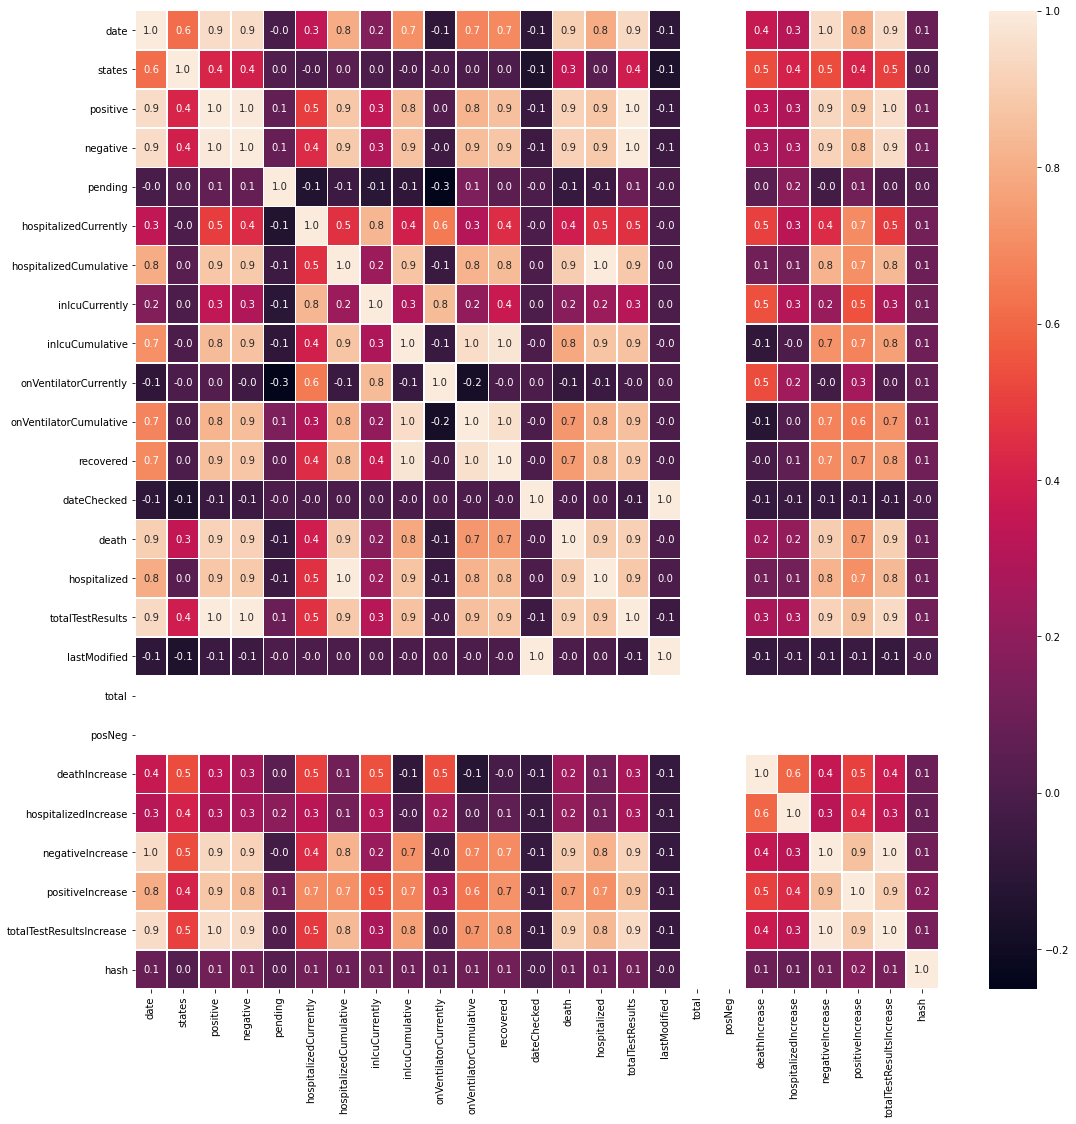

In [31]:
#correlation map
import seaborn as sns # visualization tool 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Text(0, 0.5, 'case ')

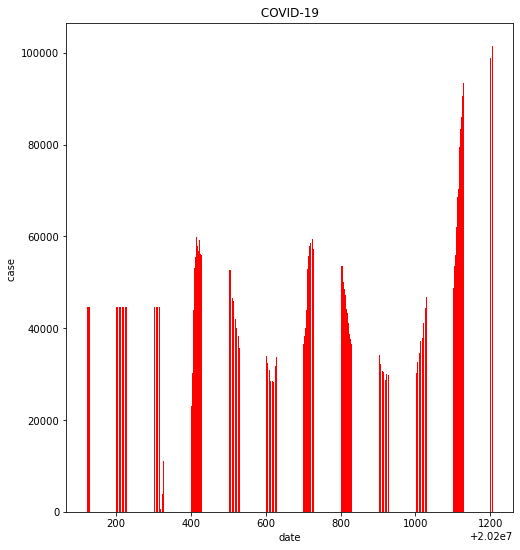

In [32]:
## state + recovered
plt.figure(figsize=(8, 9))
plt.bar(df['date'], df['hospitalizedCurrently'], color='red')
plt.title(' COVID-19 ')
plt.xlabel('date')
plt.ylabel('case ')

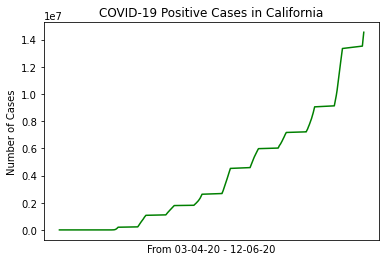

In [38]:
## date + positive
plt.plot(df['date'], df['positive'], color='green')
plt.title('COVID-19 Positive Cases in California')
plt.ylabel('Number of Cases')
plt.xlabel('From 03-04-20 - 12-06-20')
plt.xticks([])
plt.show()

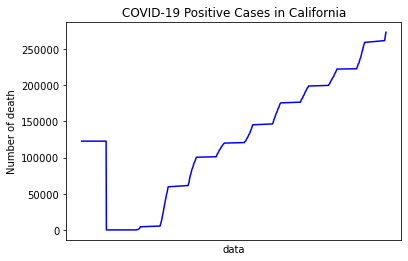

In [40]:
## date + death
plt.plot(df['date'], df['death'], color='blue')
plt.title('COVID-19 Positive Cases in California')
plt.ylabel('Number of death')
plt.xlabel('data')
plt.xticks([])
plt.show()

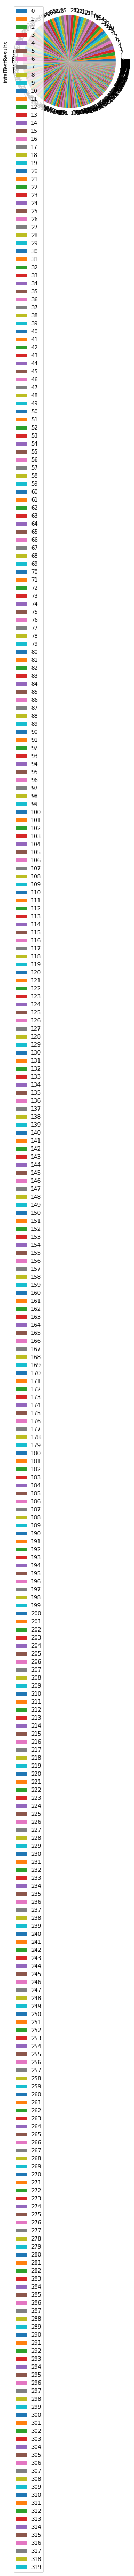

In [41]:
###https://www.kaggle.com/philrowe/cheatsheet-70-ggplot-charts-a67fec 
 # dad to find resulte-.-
    
df.plot('states' , 'totalTestResults' ,kind='pie')

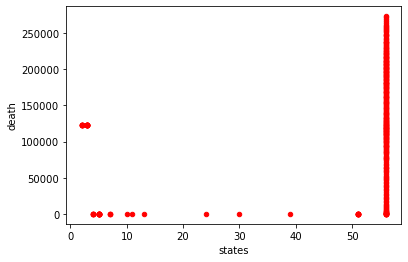

In [131]:
### the state with code 56 : 
df.plot('states' , 'death' ,kind='scatter',color ='red')

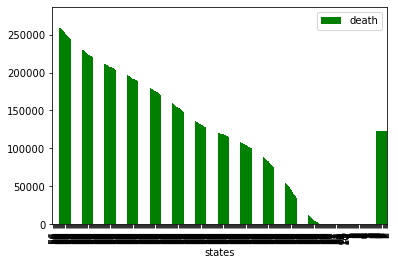

In [42]:
### the state with code 56 : 
df.plot('states' , 'death' ,kind='bar',color ='green')

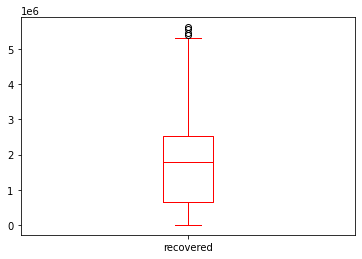

In [133]:
### the state with code 56 : 
df.plot('states' , 'recovered' ,kind='box',color ='red')

# training after normlization

In [33]:
# Normlization 

### ........date ! 

data=dfn
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

data.iloc[:,0:19]=min_max.fit_transform(data.iloc[:,0:19])


data

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,1.000000,1.0,1.000000,1.000000,0.205352,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,0.0,0.0,0.0,1138,2256,1172590,176771,1634532,0.0
1,0.999077,1.0,0.987837,0.992761,0.202927,0.997064,0.996148,0.989653,0.996392,0.987152,...,9.919901e-01,0.0,0.0,0.0,2445,3316,1526995,211073,2169756,0.0
2,0.998155,1.0,0.973315,0.983334,0.191965,0.997914,0.990486,0.984771,0.989395,0.986286,...,9.813574e-01,0.0,0.0,0.0,2563,4652,1260657,224831,1854869,0.0
3,0.997232,1.0,0.957845,0.975552,0.228436,0.992764,0.982543,0.977608,0.978978,0.967230,...,9.722677e-01,0.0,0.0,0.0,2706,5331,1238465,210204,1828230,0.0
4,0.996310,1.0,0.943383,0.967907,0.217184,0.988484,0.973441,0.975326,0.971511,0.965497,...,9.633086e-01,0.0,0.0,0.0,2733,5028,982032,195796,1459202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.003690,0.0,0.000000,0.000000,0.135980,0.436897,0.472626,0.419276,0.448693,0.430066,...,4.900427e-09,0.0,0.0,0.0,0,0,0,0,0,0.0
316,0.002768,0.0,0.000000,0.000000,0.135980,0.436897,0.472626,0.419276,0.448693,0.430066,...,4.900427e-09,0.0,0.0,0.0,0,0,0,0,0,0.0
317,0.001845,0.0,0.000000,0.000000,0.135980,0.436897,0.472626,0.419276,0.448693,0.430066,...,4.900427e-09,0.0,0.0,0.0,0,0,0,0,0,0.0
318,0.000923,0.0,0.000000,0.000000,0.135980,0.436897,0.472626,0.419276,0.448693,0.430066,...,4.900427e-09,0.0,0.0,0.0,0,0,0,0,1,0.0


In [34]:

print('linear model coeff (w)',clf.coef_)
print('linear model intetrcept (b)',clf.intercept_)
print('R_squared score (training)',clf.score(X_train,y_train))
print('R_squared score (test)',clf.score(X_test,y_test))


linear model coeff (w) [-3.92254862e+02 -6.12347174e+02  3.32784132e-02  6.14515568e-03
 -7.56843337e-01 -3.77312534e-01 -1.93326564e-02 -3.12853912e+00
  1.20412345e+01  2.01247330e+00 -1.80141848e+01 -1.14962977e-01
 -2.58282284e-12 -1.93327200e-02 -2.48101064e-03 -8.29913915e-12
  1.35429445e-11  9.09494702e-13  4.41173933e+00 -4.24456601e-01
  2.45196800e-02 -1.31056541e-01 -1.66862861e-02 -5.95864649e+03]
linear model intetrcept (b) 7923796231.36134
R_squared score (training) 0.9445514463784659
R_squared score (test) 0.9046483851017044


In [35]:
from sklearn.linear_model import Ridge
linridge=Ridge(alpha=20).fit(X_train,y_train)
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_))
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_))
print('None zero features:{}'.format (np.sum(linridge.coef_!=0)))
print('R_squared score (training):{:.3f}'.format(linridge.score(X_train,y_train)))
print('R_squared score (test):\n{:.3f}'.format(linridge.score(X_test,y_test)))


Ridge regression linear model coeff (w):
[-3.92232415e+02 -6.00778785e+02  3.32464670e-02  6.13025641e-03
 -7.57194274e-01 -3.72703146e-01 -1.85744766e-02 -3.13112521e+00
  1.19954121e+01  2.00024481e+00 -1.80152989e+01 -1.14626191e-01
  0.00000000e+00 -1.85136368e-02 -2.47143034e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.33945853e+00 -4.24087435e-01
  2.50576691e-02 -1.34941640e-01 -1.71441887e-02 -2.64403468e+02]
Ridge regression linear model intetrcept (b):7923342212.693615
None zero features:20
R_squared score (training):0.945
R_squared score (test):
0.905


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18181e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [36]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))


lasso regression linear model intercept: 7749298771.285471
lasso regression linear model coeff:
[-3.83616396e+02 -6.49585818e+02  3.45062229e-02  4.00397968e-03
 -7.66642850e-01 -3.59935858e-01 -4.80464803e-01 -2.82704210e+00
  1.29057408e+01  2.41444519e-01 -1.76190982e+01 -1.21212071e-01
  0.00000000e+00  4.38333138e-01 -7.97631661e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.47436492e+00 -4.49333939e-01
  2.32268827e-02 -1.90514818e-01 -1.51873471e-02 -5.20236314e+03]
Non-zero features: 20
R-squared score (training): 0.944
R-squared score (test): 0.904



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45633679996.46496, tolerance: 164205258.0167441
  model = cd_fast.enet_coordinate_descent(


#  CONVERT   TO    "Classification" 

# TO USE :  SVM , ..... 

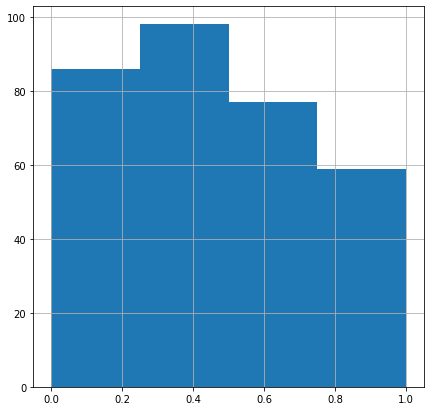

In [128]:
dfn['death'].hist(bins=4,figsize=(7,7))
plt.show()

In [136]:

########333 to 5 class  : 
def value_class(values):
    cls=0
    if values <=0.2 and  values >=0:
        cls=1
    elif values <=0.4 and values >=0.2:
        cls=2
    elif values <=0.6 and values >=0.4:
        cls=3
    elif values <=0.8 and values >=0.6:
        cls=4
    elif values <=0.1 and values >=0.8:
        cls=5     
    return cls    


In [137]:
df['death_class']=df['death'].apply(value_class)
Yclass=df['death_class']
df



,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,recovered_class,death_class
0,1.000000,1.000000,1.000000,1.000000e+00,0.205352,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000e+00,0.0,0.0,0.0,1138,2256,1172590,176771,1634532,0.0,0,0
1,0.999077,1.000000,0.987837,9.927612e-01,0.202927,0.997064,0.996148,0.989653,0.996392,0.987152,0.999696,0.991391,0.0,0.995837,0.996148,9.919901e-01,0.0,0.0,0.0,2445,3316,1526995,211073,2169756,0.0,0,0
2,0.998155,1.000000,0.973315,9.833345e-01,0.191965,0.997914,0.990486,0.984771,0.989395,0.986286,0.994833,0.972609,0.0,0.986893,0.990486,9.813574e-01,0.0,0.0,0.0,2563,4652,1260657,224831,1854869,0.0,0,0
3,0.997232,1.000000,0.957845,9.755520e-01,0.228436,0.992764,0.982543,0.977608,0.978978,0.967230,0.987234,0.960809,0.0,0.977518,0.982543,9.722677e-01,0.0,0.0,0.0,2706,5331,1238465,210204,1828230,0.0,0,0
4,0.996310,1.000000,0.943383,9.679065e-01,0.217184,0.988484,0.973441,0.975326,0.971511,0.965497,0.978723,0.946249,0.0,0.967619,0.973441,9.633086e-01,0.0,0.0,0.0,2733,5028,982032,195796,1459202,0.0,0,0
5,0.995387,1.000000,0.929911,9.618441e-01,0.131737,0.973211,0.964856,0.954898,0.962444,0.935759,0.969909,0.929261,0.0,0.957622,0.964856,9.561579e-01,0.0,0.0,0.0,2473,5222,1941714,176753,2340996,0.0,0,0
6,0.929889,1.000000,0.917750,9.498572e-01,0.225036,0.947233,0.955940,0.928685,0.953658,0.917136,0.964438,0.915048,0.0,0.948576,0.955940,9.446860e-01,0.0,0.0,0.0,1136,3394,1219808,147587,1603253,0.0,0,0
7,0.928967,1.000000,0.907595,9.423268e-01,0.224686,0.919634,0.950144,0.909371,0.947540,0.877436,0.958055,0.900558,0.0,0.944420,0.950144,9.368294e-01,0.0,0.0,0.0,803,2429,883148,135242,1289970,0.0,0,0
8,0.928044,1.000000,0.898290,9.368749e-01,0.223466,0.903867,0.945997,0.899395,0.942363,0.863433,0.956535,0.893321,0.0,0.941483,0.945997,9.305080e-01,0.0,0.0,0.0,1245,3404,1276935,154522,1709566,0.0,0,0
9,0.927122,1.000000,0.887658,9.289919e-01,0.224594,0.885955,0.940185,0.889420,0.934488,0.846398,0.954103,0.879631,0.0,0.936929,0.940185,9.221304e-01,0.0,0.0,0.0,1372,3499,1504431,193725,2126288,0.0,0,0


In [138]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
#svc.fit(X_train, y_train)
#y_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y_train) * 100, 2)
#acc_svc


In [139]:
# Logistic Regression

#from sklearn.linear_model import LogisticRegression

#lo = LogisticRegression()
#lo.fit(X_train, y_train)


In [144]:
%matplotlib notebook
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
np.set_printoptions(precision=2)
#adspy_shared_utilities='adspy_shared_utilities2.py'
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC



features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
           'dateChecked','hospitalized','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
X_data = dfn[features]
y_data = dfn['death_class']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_data, y_data, random_state = 0)
clf = SVC(C=0.001,gamma =1).fit(Xc_train, yc_train)

print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(Xc_train, yc_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(Xc_test, yc_test)))

clf

Accuracy of RBF-kernel SVC on training set: 0.28
Accuracy of RBF-kernel SVC on test set: 0.28


SVC(C=0.001, gamma=1)

In [145]:


#features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
#            'dateChecked','hospitalized','death','totalTestResults','lastModified'
#            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
#X_data = dfn[features]
#y_data = dfn['recovered']
##X_train, X_test, y_train, y_test = train_test_split(x, np.ravel(y,order='C'), random_state = 0)



#from sklearn.metrics import confusion_matrix 
#from sklearn.metrics import accuracy_score 
#from sklearn.metrics import classification_report 
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(clf, Xc_test, yc_test) 




In [146]:
%matplotlib notebook
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
np.set_printoptions(precision=2)
#adspy_shared_utilities='adspy_shared_utilities2.py'
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC



features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
            'dateChecked','hospitalized','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
X_data = dfn[features]
y_data = dfn['death_class']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_data, y_data, random_state = 0)
clfc = SVC(C=0.01,gamma =0.05).fit(Xc_train, yc_train)
clfc_predicted = clfc.predict(Xc_test)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(Xc_train, yc_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(Xc_test, yc_test)))

clfc

Accuracy of RBF-kernel SVC on training set: 0.28
Accuracy of RBF-kernel SVC on test set: 0.28


SVC(C=0.01, gamma=0.05)

# metrics

<IPython.core.display.Javascript object>


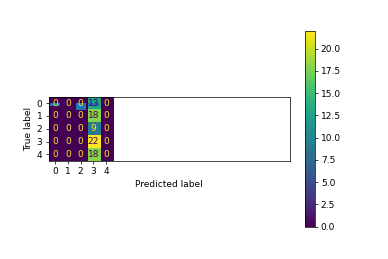

In [147]:
###################confusion_matrix   : D
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clfc, Xc_test, yc_test) 
from sklearn.metrics import precision_recall_curve



In [148]:

# not good : input _____>to bo  "output"     :D


from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(Xc_train, yc_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(Xc_test)

y_dummy_predictions



array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [149]:
dummy_majority.score(Xc_test, yc_test)

0.275

In [150]:
from sklearn.metrics import confusion_matrix
# strategy = 'most_frequent'
# SO BAD  
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(Xc_train, yc_train)
y_majority_predicted = dummy_majority.predict(Xc_test)
confusion = confusion_matrix(yc_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[ 0  0  0 13  0]
 [ 0  0  0 18  0]
 [ 0  0  0  9  0]
 [ 0  0  0 22  0]
 [ 0  0  0 18  0]]


In [151]:
# produces random predictions w/ same class proportion as training set
##########  strategy = stratified
dummy_classprop = DummyClassifier(strategy='stratified').fit(Xc_train, yc_train)
y_classprop_predicted = dummy_classprop.predict(Xc_test)
confusion = confusion_matrix(yc_test, y_classprop_predicted)

print( confusion)

[[2 3 0 5 3]
 [0 2 4 7 5]
 [1 2 0 5 1]
 [1 7 2 7 5]
 [1 6 2 6 3]]


In [152]:
svm_predicted = clfc.predict(Xc_test)
confusion = confusion_matrix(yc_test, svm_predicted)

print( confusion)

[[ 0  0  0 13  0]
 [ 0  0  0 18  0]
 [ 0  0  0  9  0]
 [ 0  0  0 22  0]
 [ 0  0  0 18  0]]


In [153]:
from sklearn.tree import DecisionTreeClassifier
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_data, y_data,test_size=0.2, random_state = 0)
dt = DecisionTreeClassifier(max_depth=2).fit(Xt_train, yt_train)
tree_predicted = dt.predict(Xt_test)
confusion = confusion_matrix(yt_test, tree_predicted)
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(Xt_test, yt_test)))
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(Xt_train, yt_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

Accuracy of D_t on test set: 0.89
Accuracy of D_t on test set: 0.78
Decision tree classifier (max_depth = 2)
 [[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  4  0  0  0]
 [ 0  3  0 16  0]
 [ 0  0  0  0 16]]


In [154]:
from sklearn.tree import DecisionTreeClassifier
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_data, y_data,test_size=0.2, random_state = 0)
dt = DecisionTreeClassifier(max_depth=3).fit(Xt_train, yt_train)
tree_predicted = dt.predict(Xt_test)
confusion = confusion_matrix(yt_test, tree_predicted)
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(Xt_test, yt_test)))
print('Accuracy of D_t on test set: {:.2f}'
     .format(dt.score(Xt_train, yt_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

Accuracy of D_t on test set: 0.95
Accuracy of D_t on test set: 0.94
Decision tree classifier (max_depth = 2)
 [[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  4  0  0]
 [ 0  3  0 16  0]
 [ 0  0  0  0 16]]


In [155]:
 dt.feature_importances_

array([0.25, 0.  , 0.51, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [156]:
num=len(X_data.columns)
plt.bar(range(num),dt.feature_importances_,align='center')
plt.show()

In [157]:
features_m = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
            'dateChecked','hospitalized','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
features_m

['date',
 'states',
 'positive',
 'negative',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'dateChecked',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

In [158]:
classname=["1","2","3","4","5"]
print(classification_report(yc_test, clfc_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         9
           3       0.28      1.00      0.43        22
           4       0.00      0.00      0.00        18

    accuracy                           0.28        80
   macro avg       0.06      0.20      0.09        80
weighted avg       0.08      0.28      0.12        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro-averaged recall_score = {:.2f} (treat instances equally)'
      .format(recall_score(yc_test, clfc_predicted, average = 'micro')))
print('Macro-averaged recall_score = {:.2f} (treat classes equally)'
      .format(recall_score(yc_test, clfc_predicted, average = 'macro')))

Micro-averaged recall_score = 0.28 (treat instances equally)
Macro-averaged recall_score = 0.20 (treat classes equally)


In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(yc_test, clfc_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(yc_test, clfc_predicted, average = 'macro')))

Micro-averaged precision = 0.28 (treat instances equally)
Macro-averaged precision = 0.06 (treat classes equally)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(yc_test, clfc_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(yc_test, clfc_predicted, average = 'macro')))

Micro-averaged f1 = 0.28 (treat instances equally)
Macro-averaged f1 = 0.09 (treat classes equally)


In [162]:
###############   IN ANTHER TACK   : D
from sklearn.tree import DecisionTreeClassifier
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_data, y_data,test_size=0.2, random_state = 0)
dt = DecisionTreeClassifier(max_depth=5).fit(Xt_train, yt_train)
tree_predicted = dt.predict(Xt_test)
confusion = confusion_matrix(yt_test, tree_predicted)
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(dt.score(Xt_test, yt_test)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(dt.score(Xt_train, yt_train)))

print('Decision tree classifier (max_depth = 2)\n', confusion)

FP = confusion.sum(axis=0) - np.diag(confusion)  
FN = confusion.sum(axis=1) - np.diag(confusion)
TP = np.diag(confusion)
TN = confusion.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy of RBF-kernel SVC on test set: 1.00
Accuracy of RBF-kernel SVC on test set: 1.00
Decision tree classifier (max_depth = 2)
 [[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 16]]


#   DBscan   &Agglomerative &Kmeans Clustering

<IPython.core.display.Javascript object>


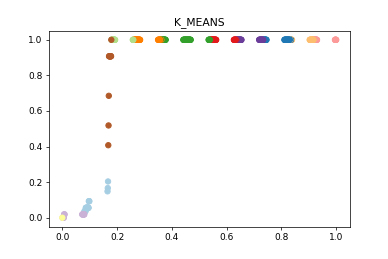

Text(0.5, 1.0, 'K_MEANS')

In [163]:
############################## UnsupperVised Learning ##############################################
############################# Kmeans Clustering ###################################################

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#from adspy_shared_utilities import plot_labelled_scatter
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
            'dateChecked','hospitalized','death','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
X_data = dfn[features]
y_data = dfn['death_class']

from sklearn.preprocessing import MinMaxScaler
X_normalized = MinMaxScaler().fit(X_data).transform(X_data)

kmeans = KMeans(n_clusters = 12)
kmeans.fit(X_normalized)
y_pred=kmeans.predict(X_normalized)
plt.figure()
plt.scatter(X_normalized[:,0],X_normalized[:,1],c=y_pred,cmap='Paired')
plt.title("K_MEANS")

#plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


<IPython.core.display.Javascript object>


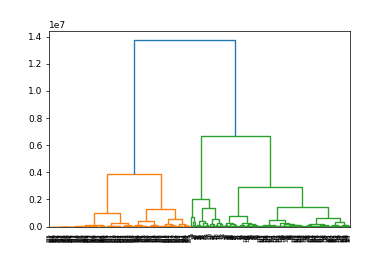

In [164]:
######################################### Agglomerative Clustering ################################

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering


features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
            'dateChecked','hospitalized','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
X_data = dfn[features]
y_data = dfn['death_class']

X_normalized = MinMaxScaler().fit(X_data).transform(X_data)

cls = AgglomerativeClustering(n_clusters = 12, linkage='ward')
cls_assignment = cls.fit_predict(X_normalized)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_data))
plt.show()

<IPython.core.display.Javascript object>


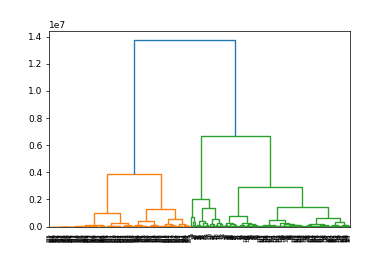

In [165]:
######################################### Agglomerative Clustering ################################

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering


features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
            'dateChecked','hospitalized','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
X_data = dfn[features]
y_data = dfn['death']

X_normalized = MinMaxScaler().fit(X_data).transform(X_data)

cls = AgglomerativeClustering(n_clusters = 12, linkage='ward')
cls_assignment = cls.fit_predict(X_normalized)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_data))
plt.show()

Cluster membership values:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1

<IPython.core.display.Javascript object>


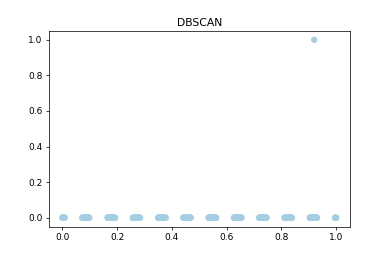

Text(0.5, 1.0, 'DBSCAN')

In [166]:
########################################### DBscan clustering ##################################

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
X_normalized = MinMaxScaler().fit(X_data).transform(X_data)
dbscan = DBSCAN(eps =1000, min_samples = 500)
dbscan.fit(X_normalized)
y_pred = dbscan.fit_predict(X_normalized)
print("Cluster membership values:\n{}".format(y_pred))
plt.figure()
plt.scatter(X_normalized[:,0],X_normalized[:,-1],c=y_pred,cmap='Paired')
plt.title("DBSCAN")


# 

In [167]:

features = ['date','states','positive','negative','hospitalizedCurrently','hospitalizedCumulative',
            'dateChecked','hospitalized','totalTestResults','lastModified'
            ,'total','posNeg','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease','totalTestResultsIncrease','hash']
X_data = dfn[features]
y_data = dfn['death_class']

X_train, X_test, y_train, y_test = train_test_split(X_data, np.ravel(y_data,order='C'), random_state = 0)


In [168]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X_data, np.ravel(y_data,order='C'), random_state = 3)
model.fit(X_train, y_train)
print('Accuracy of  KNeighborsClassifier classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of  KNeighborsClassifier classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of  KNeighborsClassifier classifier on training set: 0.92
Accuracy of  KNeighborsClassifier classifier on test set: 0.84


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
np.set_printoptions(precision=2)
from sklearn.svm import SVC
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(X_data, np.ravel(y_data,order='C'),test_size = 0.2,random_state = 0)
clf = SVC( C=1,gamma=0.01).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RBF-kernel SVC on training set: 0.95
Accuracy of RBF-kernel SVC on test set: 0.30


In [186]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.78
Accuracy of Decision Tree classifier on test set: 0.89


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_data,y_data)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(clf3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
    .format(clf3.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.78
Accuracy of Decision Tree classifier on test set: 0.89


In [188]:
Knn_predicted = model.predict(X_test)
Knn_confusion = confusion_matrix(y_test, Knn_predicted)
print('KNN \n\n', Knn_confusion)
svm_predicted = clf.predict(X_test)
svm_confusion = confusion_matrix(y_test, svm_predicted)
print('SVM \n\n', svm_confusion)
tree_predicted = clf2.predict(X_test)
tree_confusion = confusion_matrix(y_test, tree_predicted)
print('DCT \n\n', tree_confusion)
rnf_predicted = clf3.predict(X_test)
rnf_confusion = confusion_matrix(y_test, rnf_predicted)
print('RNF \n\n', rnf_confusion)

KNN 

 [[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  2 17  0]
 [ 1  0  0  2 13]]
SVM 

 [[ 0  0  0 10  0]
 [ 0  0  0 15  0]
 [ 0  0  0  4  0]
 [ 0  0  0 19  0]
 [ 0  0  0 16  0]]
DCT 

 [[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  4  0  0  0]
 [ 0  3  0 16  0]
 [ 0  0  0  0 16]]
RNF 

 [[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  4  0  0  0]
 [ 0  3  0 16  0]
 [ 0  0  0  0 16]]


In [189]:
print('KNN \n', 
      classification_report(y_test, Knn_predicted,labels=[0,1,2,3,4,5,6,7,8,9,10,11], target_names=['A1','A15','A7','B2','B3','C11','C6','D14','D4','E13','E18','E5']))
print('SVM\n', 
      classification_report(y_test, svm_predicted,labels=[0,1,2,3,4,5,6,7,8,9,10,11], target_names=['A1','A15','A7','B2','B3','C11','C6','D14','D4','E13','E18','E5']))
print('Random Forest\n', 
      classification_report(y_test, rnf_predicted,labels=[0,1,2,3,4,5,6,7,8,9,10,11], target_names=['A1','A15','A7','B2','B3','C11','C6','D14','D4','E13','E18','E5']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted,labels=[0,1,2,3,4,5,6,7,8,9,10,11], target_names=['A1','A15','A7','B2','B3','C11','C6','D14','D4','E13','E18','E5']))

KNN 
               precision    recall  f1-score   support

          A1       0.91      1.00      0.95        10
         A15       1.00      1.00      1.00        15
          A7       0.67      1.00      0.80         4
          B2       0.89      0.89      0.89        19
          B3       1.00      0.81      0.90        16
         C11       0.00      0.00      0.00         0
          C6       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         0
          D4       0.00      0.00      0.00         0
         E13       0.00      0.00      0.00         0
         E18       0.00      0.00      0.00         0
          E5       0.00      0.00      0.00         0

   micro avg       0.92      0.92      0.92        64
   macro avg       0.37      0.39      0.38        64
weighted avg       0.93      0.92      0.92        64

SVM
               precision    recall  f1-score   support

          A1       0.00      0.00      0.00        10
         A15 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
##Model evaluation
#We can now rank our evaluation of all the models to choose the best one
#for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.
#models = pd.DataFrame({
    #'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
     #         'Random Forest', 'Naive Bayes', 'Perceptron', 
    #          'Stochastic Gradient Decent', 'Linear SVC', 
   #           'Decision Tree'],
  #  'Score': [acc_svc, acc_knn, acc_log, 
  #            acc_random_forest, acc_gaussian, acc_perceptron, 
 #            acc_sgd, acc_linear_svc, acc_decision_tree]})
#models.sort_values(by='Score', ascending=False)


In [191]:
#X_train,y_train=X_train,y_train==1
#clf = SVC( C=1,gamma=0.1)
#accuracy is the default scoring metric
#print('Cross-validation (accuracy)', cross_val_score(clf, X_train,y_train,cv=5))
#use AUC as scoring metric
#print('Cross-validation (AUC)', cross_val_score(clf,X_train,y_train, cv=5, scoring = 'roc_auc'))
#use recall as scoring metric
#print('Cross-validation (recall)', cross_val_score(clf,X_train,y_train, cv=5, scoring = 'recall'))

# Principal Component Analysis (PCA) 

Principal Components Analysis (PCA) is an algorithm to transform the columns of a dataset into a new set of features called Principal Components. By doing this, a large chunk of the information across the full dataset is effectively compressed in fewer feature columns. This enables dimensionality reduction and ability to visualize the separation of classes or clusters if any.
(PCA is a fundamentally a simple dimensionality reduction technique that transforms the columns of a dataset into a new set features called Principal Components (PCs).)

1-Building PCA with Scikit-learn
2-Weights of Principal Components
3-Percentage of Variance Explained with each PC
4- Plot the clustering tendency

In [192]:
# Load 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)
%matplotlib inline

In [193]:
print(df.shape)
df.head()

(320, 27)


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,death,hospitalized,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,recovered_class,death_class
0,1.000000,1.0,1.000000,1.000000,0.205352,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1138,2256,1172590,176771,1634532,0.0,0,0
1,0.999077,1.0,0.987837,0.992761,0.202927,0.997064,0.996148,0.989653,0.996392,0.987152,0.999696,0.991391,0.0,0.995837,0.996148,0.991990,0.0,0.0,0.0,2445,3316,1526995,211073,2169756,0.0,0,0
2,0.998155,1.0,0.973315,0.983334,0.191965,0.997914,0.990486,0.984771,0.989395,0.986286,0.994833,0.972609,0.0,0.986893,0.990486,0.981357,0.0,0.0,0.0,2563,4652,1260657,224831,1854869,0.0,0,0
3,0.997232,1.0,0.957845,0.975552,0.228436,0.992764,0.982543,0.977608,0.978978,0.967230,0.987234,0.960809,0.0,0.977518,0.982543,0.972268,0.0,0.0,0.0,2706,5331,1238465,210204,1828230,0.0,0,0
4,0.996310,1.0,0.943383,0.967907,0.217184,0.988484,0.973441,0.975326,0.971511,0.965497,0.978723,0.946249,0.0,0.967619,0.973441,0.963309,0.0,0.0,0.0,2733,5028,982032,195796,1459202,0.0,0,0


In [194]:
# PCA
pca = PCA()
df_pca = pca.fit_transform(X=X)
print('Accuracy of PCA: {:.2f}'
     .format(clf2.score(X_train, y_train)))
# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  
df_pca.head()

Accuracy of PCA: 0.78
(320, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.873110e+08,4.204675e+06,-671601.963987,9.713811e+05,-421555.948415,27849.608659,36231.235907,-11173.497687,5086.267223,-1204.898257,-2327.451067,1306.808479,1218.570975,259.963133,-676.055316,7.750300,31.597921,-0.205254,0.016839,0.002670,-2.681271e-11,3.198990e-15,7.256508e-16,8.518478e-17
1,1.853015e+08,4.043626e+06,-757752.131877,1.062875e+06,215837.330781,63810.566682,-39140.831252,-29575.194342,1650.741180,-5563.586624,-846.709433,198.116362,1938.248523,-420.784613,-17.245153,-70.261276,30.937581,0.006054,0.016497,-0.038721,1.363679e-10,-8.180722e-15,-3.146658e-16,-1.584085e-17
2,1.826432e+08,3.869596e+06,-655508.827138,8.988005e+05,-142738.092777,35548.369785,-53454.460163,1076.994367,14499.652892,12280.073967,-387.164986,879.887338,1325.508921,-719.756666,-33.606181,-117.201843,26.477401,0.389893,0.013741,-0.045777,4.142971e-11,-9.125313e-15,1.016962e-16,6.695261e-17
3,1.803995e+08,3.674225e+06,-584937.489101,8.054732e+05,-135351.213414,32524.432553,-54705.462798,-3573.531018,9682.389219,5036.327108,415.808120,1216.540805,985.433215,-668.049025,171.682641,-61.093495,35.084618,-0.415391,0.018372,-0.043246,3.274504e-11,3.231717e-15,-1.054703e-15,-9.577766e-17
4,1.781876e+08,3.498118e+06,-449618.390701,6.215989e+05,-524308.228975,5250.451002,-21029.406594,19501.549312,14938.759586,12775.019491,-58.163417,1505.256084,429.691879,-773.195079,406.521746,-62.788162,31.420196,-0.496014,0.016480,-0.033411,-5.822609e-11,3.663519e-15,-5.956388e-16,-3.087603e-17


In [195]:
# Get the Weights (aka, loadings or eigenvectors).
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.000004,8.881797e-08,0.049544,0.630630,0.000012,0.000102,0.001724,0.000014,0.000086,-5.723932e-07,0.000009,0.015510,-3.883680e-11,0.001724,0.774301,-3.883680e-11,-0.000000e+00,-0.000000e+00,0.000002,0.000006,0.004635,0.000502,0.006406,7.914259e-11
1,-0.000058,-4.749381e-06,0.013054,-0.747633,0.001864,0.006364,-0.006731,0.001791,0.000763,7.495268e-04,0.000098,0.270107,2.074998e-09,-0.006731,0.603278,2.074998e-09,1.727234e-77,6.434447e-86,0.000054,0.000135,-0.050271,0.008796,-0.035063,3.689205e-09
2,-0.000090,-1.783613e-05,-0.405056,0.196369,-0.001817,-0.007609,0.038919,-0.001359,0.005340,-1.043460e-03,0.000610,0.854627,7.810177e-09,0.038919,-0.149230,7.810177e-09,-1.854603e-68,-0.000000e+00,-0.000768,-0.001476,-0.132648,-0.021238,-0.153428,-2.723356e-09
3,0.000007,-6.389575e-06,0.859747,0.057342,-0.015704,0.020352,0.075871,0.002971,0.004270,1.388044e-03,0.000055,0.423047,2.869930e-09,0.075871,-0.112883,2.869930e-09,1.991365e-59,-5.934730e-67,0.000061,-0.000612,0.155345,0.020474,0.170533,3.003730e-09
4,0.000014,-3.996914e-06,-0.300267,-0.024852,-0.008361,0.003923,0.031998,-0.002223,0.002871,-7.650808e-04,0.000153,0.091084,1.823228e-09,0.031998,0.027816,1.823228e-09,-4.176195e-53,2.489206e-60,-0.000426,0.000191,0.609271,0.046167,0.724336,3.137135e-08


In [196]:
#Compute the mean centered data.
X_mean = X - X.mean()
X_mean.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dateChecked,hospitalized,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,545.496875,7.146875,1.057067e+07,1.149148e+08,4549.776978,56964.626415,308867.895683,10944.324219,17571.264591,3947.929961,1768.364,3.842382e+06,-0.003125,308867.895683,1.475504e+08,-0.003125,0.0,0.0,283.70625,425.7625,6.663828e+05,131352.140625,9.968324e+05,-0.003125
1,544.496875,7.146875,1.039390e+07,1.137422e+08,4390.776978,56667.626415,306611.895683,10749.324219,17456.264591,3858.929961,1767.364,3.793964e+06,-0.003125,306611.895683,1.459159e+08,-0.003125,0.0,0.0,1590.70625,1485.7625,1.020788e+06,165654.140625,1.532056e+06,-0.003125
2,543.496875,7.146875,1.018282e+07,1.122152e+08,3671.776978,56753.626415,303295.895683,10657.324219,17233.264591,3852.929961,1751.364,3.688327e+06,-0.003125,303295.895683,1.437461e+08,-0.003125,0.0,0.0,1708.70625,2821.7625,7.544498e+05,179412.140625,1.217169e+06,-0.003125
3,542.496875,7.146875,9.957994e+06,1.109545e+08,6063.776978,56232.626415,298643.895683,10522.324219,16901.264591,3720.929961,1726.364,3.621956e+06,-0.003125,298643.895683,1.418912e+08,-0.003125,0.0,0.0,1851.70625,3500.7625,7.322578e+05,164785.140625,1.190530e+06,-0.003125
4,541.496875,7.146875,9.747790e+06,1.097161e+08,5325.776978,55799.626415,293312.895683,10479.324219,16663.264591,3708.929961,1698.364,3.540066e+06,-0.003125,293312.895683,1.400630e+08,-0.003125,0.0,0.0,1878.70625,3197.7625,4.758248e+05,150377.140625,8.215024e+05,-0.003125


In [197]:
# Compute PC1 for row 1. 
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])  
#> -134.272

185301517.0897492

In [198]:
print(pca.explained_variance_ratio_.round(2)[:10])
#> [0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


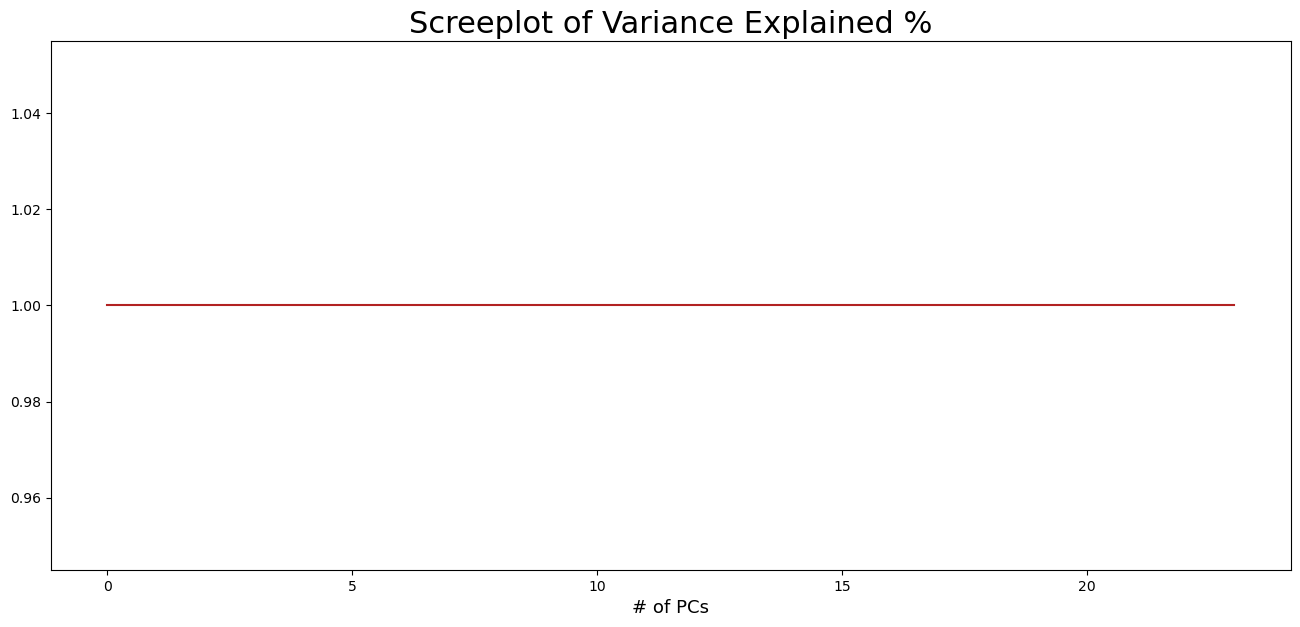

In [199]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=13)
plt.show()
